<a href="https://colab.research.google.com/github/Aki-max-min/AI-Bootcamp/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import cv2
from google.colab.patches import cv2_imshow


In [2]:
#tensorflow and pytorch

In [3]:
(x_train, y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape


(10000, 32, 32, 3)

In [6]:
x_train[0].shape #this shows that it is a colored image with low resoultion

(32, 32, 3)

In [7]:
# full hd image: 1920 x 1000 resoultion

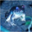

In [8]:
cv2_imshow(x_train[0])

In [9]:
import matplotlib.pyplot as plt


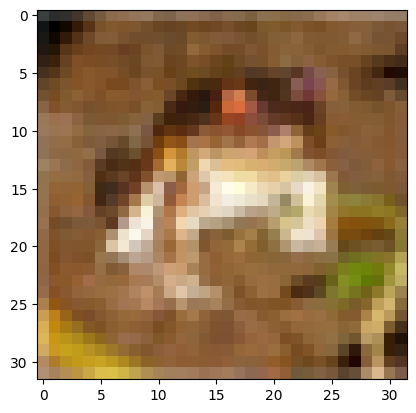

In [10]:
plt.imshow(x_train[0])

In [11]:
y_train[0] #so 6 means its a frog

array([6], dtype=uint8)

Label 	Description
0 	airplane
1 	automobile
2 	bird
3 	cat
4 	deer
5 	dog
6 	frog
7 	horse
8 	ship
9 	truck

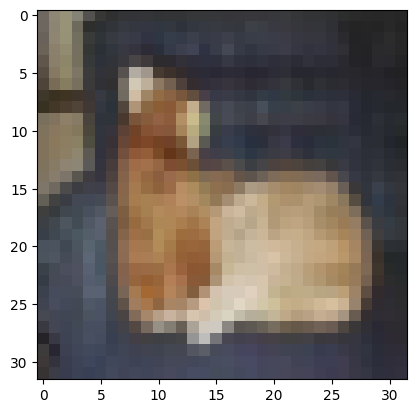

In [12]:
plt.imshow(x_train[17])

In [13]:
y_train[17] #so 3 means its a cat

array([3], dtype=uint8)

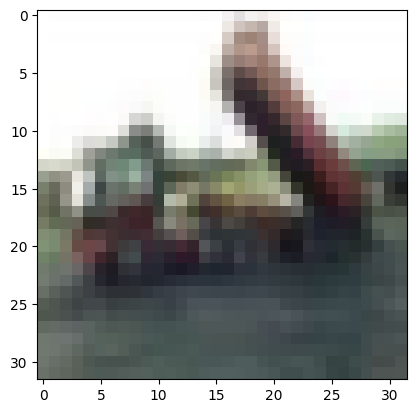

In [14]:
plt.imshow(x_train[2])

In [15]:
y_train[2] #so 9 means its a truck

array([9], dtype=uint8)

In [16]:
y_train # since we can see repetetive values here we will get only unique values

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
import numpy as np

In [18]:
np.unique(y_train) #so this is correct as cfar 10 has 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
lables=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
len(lables) #10 classes

10

truck


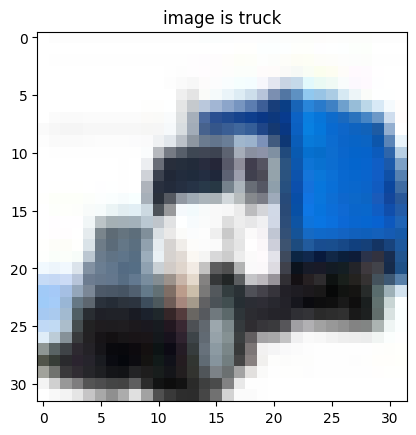

In [21]:
i=np.random.randint(1,50000)
plt.imshow(x_train[i])
print(lables[y_train[i][0]])
plt.title(f'image is {lables[y_train[i][0]]}')
plt.show()

In [22]:
x_train=x_train/255.0
x_test=x_test/255.0

In [23]:
#normalization above

In [24]:
cnn1=keras.models.Sequential()
cnn1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3))) #1st layer #here 32 is no of kernals it should ne in powers of 2 for best results
cnn1.add(keras.layers.MaxPooling2D())#maxpooling extracts the best(max)freatures from small pools, take the brightest pixcles etcso after every convulision layer we will add a pooling layer
cnn1.add(keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
cnn1.add(keras.layers.MaxPooling2D())
cnn1.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(keras.layers.Flatten())
cnn1.add(keras.layers.Dense(128,activation='relu'))
cnn1.add(keras.layers.Dropout(0.3))
cnn1.add(keras.layers.Dense(10,activation='softmax')) #multiclass classification so softmax

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,738 (553.66 KB)

 Trainable params: 141,738 (553.66 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
(3*3*3*32) + 32 # size of kernel, number of fliters and chanels rgb

896

In [27]:
(3*3*32*128) + 128

36992

In [28]:
(3*3*128*32)+ 32

36896

In [29]:
4*4*32

512

In [30]:
(512*128)+128

65664

In [31]:
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #this is a classification so we will use accuracy matrix

In [32]:
history=cnn1.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2679 - loss: 1.9394 - val_accuracy: 0.4495 - val_loss: 1.5021
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4634 - loss: 1.4590 - val_accuracy: 0.5369 - val_loss: 1.2715
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5285 - loss: 1.3072 - val_accuracy: 0.5562 - val_loss: 1.2258
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5688 - loss: 1.2092 - val_accuracy: 0.6034 - val_loss: 1.1007
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6019 - loss: 1.1241 - val_accuracy: 0.6236 - val_loss: 1.0470
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6206 - loss: 1.0711 - val_accuracy: 0.6428 - val_loss: 1.0035
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6430 - loss: 1.0097 - val_accuracy: 0.6538 - val_loss: 0.9691
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6608 - loss: 0.9587 - val_accuracy: 

In [32]:
#since our accuracy 86 and val_accuracy is 72 there is some overfitting happening